### Topic 1: Apply PCA

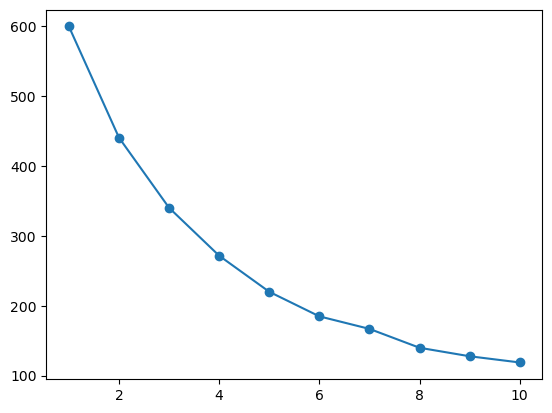

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("mall_customers_loadsheet.csv")
# print(df.head())
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
# print(X.head())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]
from sklearn.cluster import KMeans
inertia_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
# print(inertia_values)
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia_values,marker='o')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.title("Elbow Curve for K-Means")
# plt.savefig("Images/elbow_curve.png", dpi=300, bbox_inches="tight")
# plt.show()



In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:5]

array([[ 1.03949752,  0.0649737 ],
       [ 0.67142523, -1.52197507],
       [ 0.46754173, -1.58365506],
       [ 1.77143955, -1.10862488],
       [ 1.18352485,  1.19970595]])

### Topic 2: Explained Variance Ratio (PC1, PC2)

In [3]:
pca.explained_variance_ratio_


array([0.36957846, 0.34706287])

### Topic 3: Prepare data for plotting clusters in 2D

In [8]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

import pandas as pd

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

pca_df["Cluster"] = clusters

pca_df.head()


,PC1,PC2,Cluster
0,1.039498,0.064974,1
1,0.671425,-1.521975,1
2,0.467542,-1.583655,1
3,1.771440,-1.108625,1
4,1.183525,1.199706,3


### Final Topic: Plot Clusters in 2D (PC1 vs PC2)

This is where everything comes together:

K-Means → created clusters

PCA → reduced data to 2D

Plot → makes clusters visible to humans

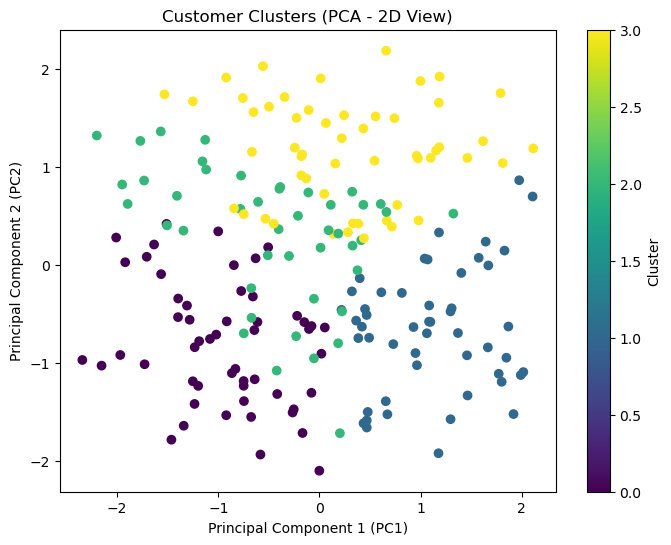

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Cluster"],
    cmap="viridis"
)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Customer Clusters (PCA - 2D View)")
plt.colorbar(label="Cluster")

plt.savefig("Images/pca_clusters_2d.png", dpi=300, bbox_inches="tight")
plt.show()